# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

C:\Users\Aleja\AppData\Local\Temp\ipykernel_19288\3169465776.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [2]:
# YOUR CODE HERE
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [4]:
# your solution here
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [5]:
# YOUR CODE HERE
print(temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes
None


#### Selecciona las filas en las que el estado es New York

In [7]:
# YOUR CODE HERE
ny_temp = temp.copy()
ny_temp = ny_temp[ny_temp["State"] == "New York"]
ny_temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [9]:
# YOUR CODE HERE
ny_temp["Temperature"].mean()


10.74074074074074

#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [11]:
# your answer here
city_more_15c = temp.copy()
city_more_15c = city_more_15c[city_more_15c["Temperature"] > 15]
city_more_15c


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [12]:
# YOUR CODE HERE
city_more_15c[["City","Temperature"]]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [17]:
# YOUR CODE HERE
city_temp_15_20 = temp.copy()
city_temp_15_20 = city_temp_15_20[city_temp_15_20["Temperature"].between(15, 20, inclusive="neither")] 

city_temp_15_20

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [39]:
# YOUR CODE HERE
temperature_by_state = temp.groupby('State')['Temperature'].agg(['mean', 'std'])
temperature_by_state

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [41]:
# YOUR CODE HERE
employee = pd.read_csv('Employee.csv')

#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [53]:
# YOUR CODE HERE
print(employee.info())
employee

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes
None


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

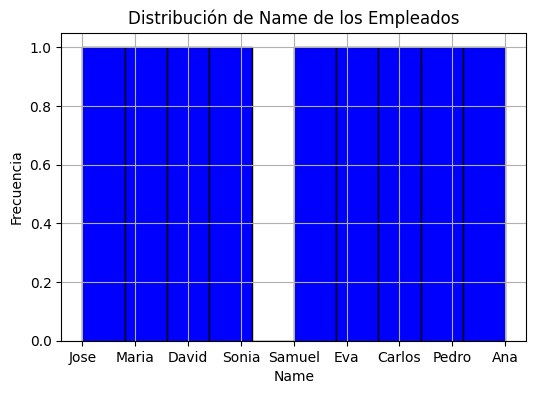

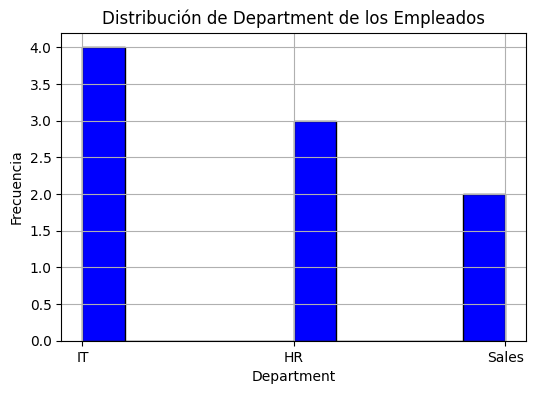

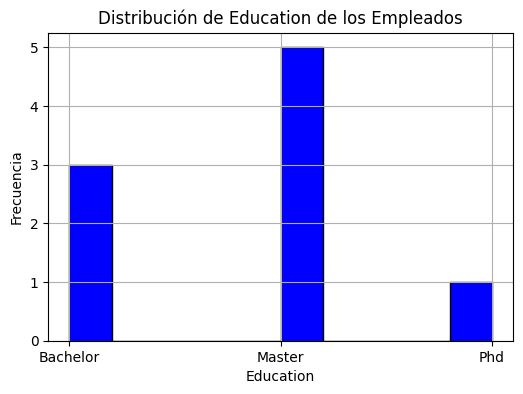

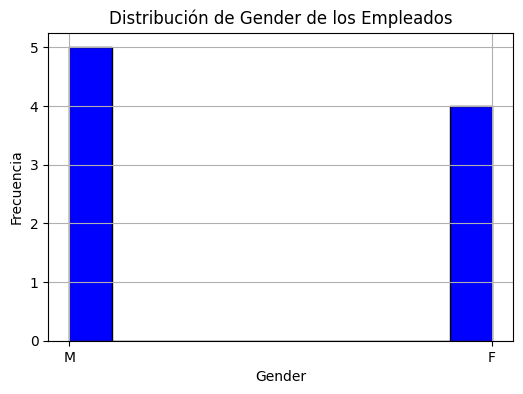

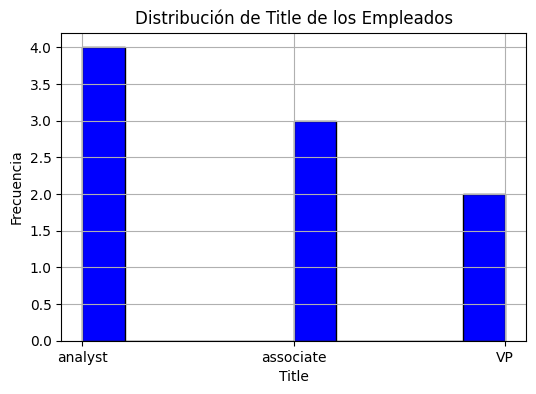

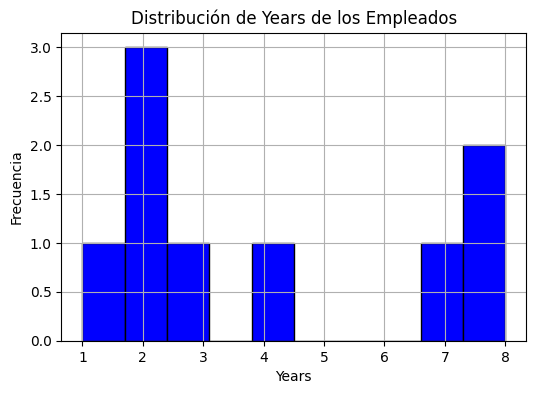

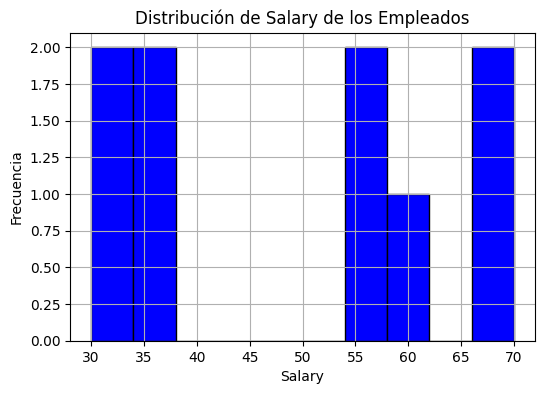

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

for columna in employee.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(employee[f'{columna}'], bins=10, color='blue', edgecolor='black')
    plt.title(f'Distribución de {columna} de los Empleados')
    plt.xlabel(f'{columna}')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

#### ¿Cuál es el salario medio en esta empresa?

In [62]:
# YOUR CODE HERE

salary_mean = employee['Salary'].mean().__round__(2)
salary_mean

48.89

#### ¿Cuál es el salario más alto?

In [68]:
# YOUR CODE HERE
max_salary = employee['Salary'].max()
max_salary
who_max_salary = employee[employee["Salary"] == max_salary]
who_max_salary[['Name','Salary']]

,Name,Salary
6,Carlos,70
8,Ana,70


#### ¿Cuál es el salario más bajo?

In [71]:
# YOUR CODE HERE
min_salary = employee['Salary'].min()
min_salary

30

#### ¿Quiénes son los empleados con el salario más bajo?

In [70]:
# YOUR CODE HERE
who_min_salary = employee[employee["Salary"] == min_salary]
who_min_salary[['Name','Salary']]

,Name,Salary
1,Maria,30
2,David,30


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [82]:
# YOUR CODE HERE
print(employee.iloc[2])

# OR 

david = employee[employee['Name'] == "David"]
david

Name            David
Department         HR
Education      Master
Gender              M
Title         analyst
Years               2
Salary             30
Name: 2, dtype: object


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### ¿Podría dar sólo el sueldo de David?

In [85]:
# YOUR CODE HERE

salary_david = employee.loc[employee['Name'] == "David", 'Salary'].squeeze()
salary_david

30

#### Printea todas las líneas en las que el cargo es asociado

In [87]:
# YOUR CODE HERE
asociados = employee[employee['Title'] == 'associate']
asociados

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


In [113]:
def color_red_associate(val):
    color = 'green' if val == "associate" else 'white'
    return 'color: %s' % color

employee.style.map(color_red_associate)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [100]:
# YOUR CODE HERE
print(employee.head(3))
print(employee.iloc[:3])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30
    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [98]:
# YOUR CODE HERE
print(employee[:3])
print(employee.loc[:2])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30
    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [102]:
# YOUR CODE HERE
asociados_55 = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
asociados_55

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [119]:
# YOUR CODE HERE
years = employee.groupby('Years')['Salary'].agg(['mean'])
years

,mean
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


#### ¿Cuál es el salario medio por título?

In [120]:
# YOUR CODE HERE
titles = employee.groupby('Title')['Salary'].agg(['mean'])
titles

,mean
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

In [ ]:
# YOUR CODE HERE

In [ ]:
# print first quartile here

In [ ]:
# print third quartile here

#### ¿Es diferente el salario medio por género?

In [ ]:
# your answer here

#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [ ]:
# your answer here

### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [ ]:
# your answer here


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [ ]:
# your answer here

#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [ ]:
# your answer here

In [ ]:
# your answer here

#### ¿Cuál es el precio medio de compra?

In [ ]:
# your answer here

#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Seleccione todos los clientes que tenemos en España

In [ ]:
# your answer here

#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [ ]:
# your answer here

#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [ ]:
# your answer here

#### Selecciona pedidos de España superiores a 50 artículos

In [ ]:
# your answer here

#### Seleccionar todos los pedidos gratuitos

In [ ]:
# your answer here

#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [ ]:
# your answer here

#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [ ]:
# your answer here

#### Muestra la distribución de frecuencias del importe gastado en España.

In [ ]:
# your answer here

#### Seleccione todos los pedidos realizados en el mes de agosto

In [ ]:
# your answer here

#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [ ]:
# your answer here

#### ¿Cuál es el gasto medio por país?

In [ ]:
# your answer here

#### ¿Cuál es el artículo más caro?

In [ ]:
# your answer here

#### ¿Cuál fue la cantidad media gastada al año?

In [ ]:
# your answer here